In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import copy
import random
import time
import itertools

#Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#systems
# from ANCR_v2 import *
# from ANCR_v3 import *
#from ANCR_v4 import *
from ANCR_v4_3 import *


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

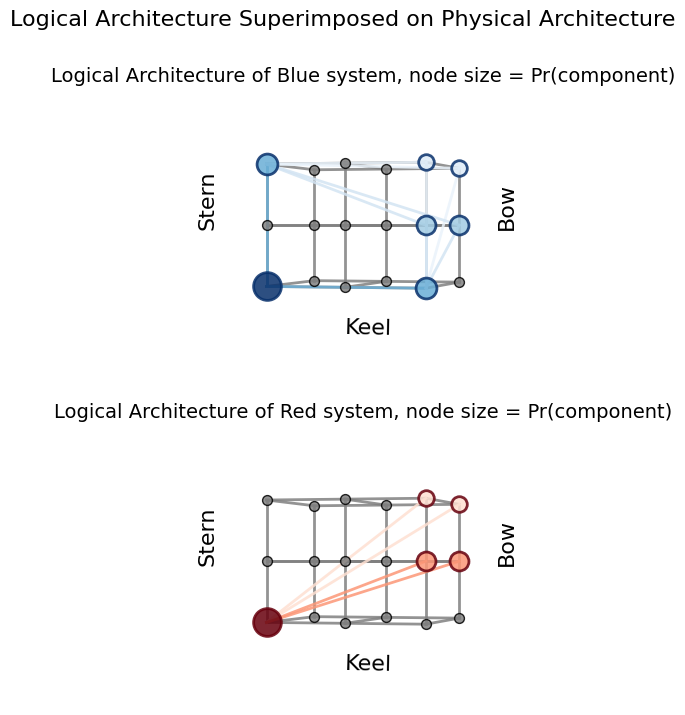

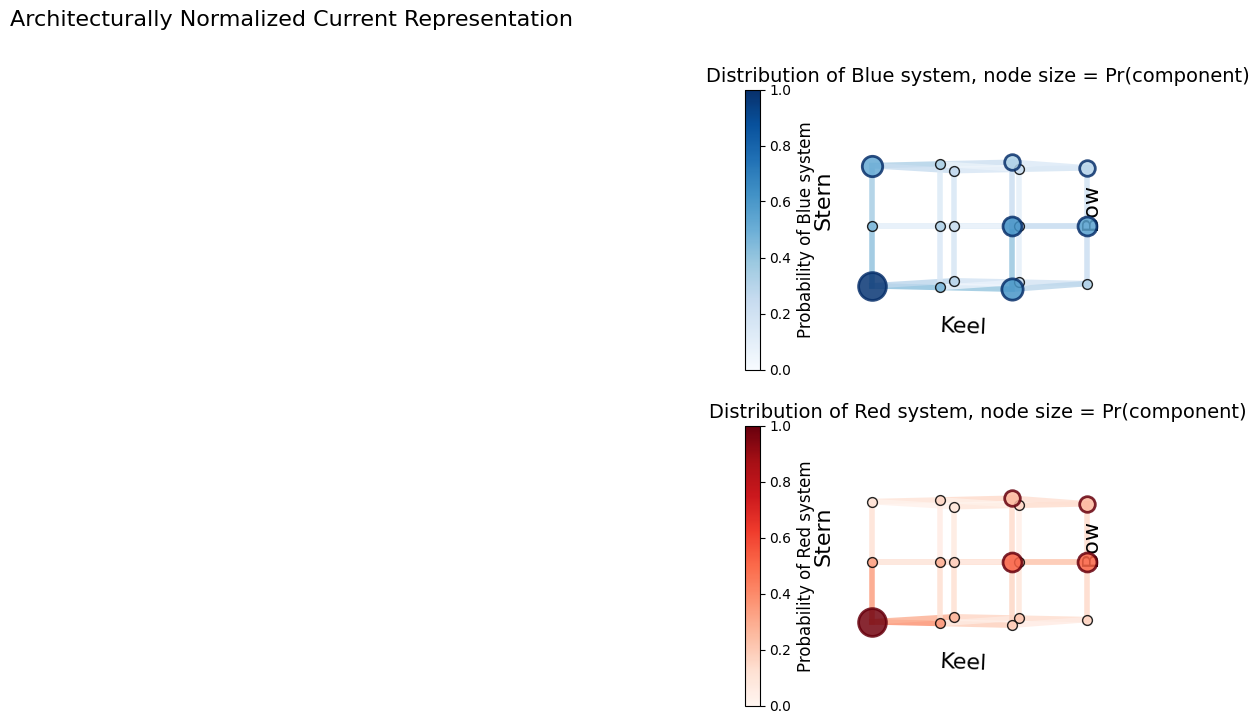

In [2]:
# Physical Architecture
g = nx.grid_graph(dim=[3, 2, 3])

# Logical Architecture
la = {}
la['components'] = {}
la['systems'] = []

# components
c1 = {(0, 0, 0): 1.0, (0, 1, 0): 1.0}
la['components']['c1'] = {}
la['components']['c1']['loc'] = c1

c2 = {(2, 0, 2): .25, (2, 0, 1): .75, (2, 1, 2): .25, (2, 1, 1): .75 }
la['components']['c2'] = {}
la['components']['c2']['loc'] = c2

cu = {(2, 0, 0): 'un', (0, 0, 2): 'un', (2, 1, 0): 'un', (0, 1, 2): 'un'}  # ,(1,0,0):'un'}
la['components']['cu'] = {}
la['components']['cu']['loc'] = cu

# systems
# power
p = nx.DiGraph()
p.add_node('c1', loc=la['components']['c1']['loc'])
p.add_node('c2', loc=la['components']['c2']['loc'])
p.add_node('cu', loc=la['components']['cu']['loc'])
p.add_edges_from([('c1', 'cu'), ('cu', 'c2')])
#print(p.nodes.data())
la['Blue'] = p
la['systems'].append('Blue')

# cooling
c = nx.DiGraph()
c.add_node('c1', loc=la['components']['c1']['loc'])
c.add_node('c2', loc=la['components']['c1']['loc'])
c.add_edges_from([('c2', 'c1')])
la['Red'] = c
la['systems'].append('Red')

# add unique physical architecture to each edge
ph_ini = 0.5
num_obj = 2
for sys, net in la.items():
    if sys not in la['systems']:
        continue
    for j, k in net.edges():
        # print j,k
        # create unique phyical network for that edge
        g_edge = nx.Graph()
        for a, b in g.edges():
            # print a,b
            i = 0.0  # current
            r = 1.0  # resistance
            ph = [ph_ini for x in range(num_obj)]  # pheromone
            h = [1.0 for x in range(num_obj)]  # heuristic
            g_edge.add_edge(a, b, i=i, r=r, ph=ph, h=h)  # add edge with data

        for n in g.nodes():
            g_edge.nodes[n]['i'] = 0.0  # set current for nodes
            ph = [ph_ini for x in range(num_obj)]  # pheromone
            h = [1.0 for x in range(num_obj)]  # heuristic
            g_edge.nodes[n]['ph'] = ph
            g_edge.nodes[n]['h'] = h
        net[j][k]['g'] = g_edge
for comp in la['components']:
    # assign current, pheromones, resistances and heuristics to component locations
    la['components'][comp]['i'] = {}
    la['components'][comp]['r'] = {}
    la['components'][comp]['ph'] = {}
    la['components'][comp]['h'] = {}
    for l in la['components'][comp]['loc']:
        la['components'][comp]['i'][l] = 0.0
        la['components'][comp]['r'][l] = 1.0
        la['components'][comp]['ph'][l] = [ph_ini for x in range(num_obj)]  # pheromone
        la['components'][comp]['h'][l] = [1.0 for x in range(num_obj)]  # heuristic

# test changing r
# la['components']['cu']['r'][(2,0,0)]=1E-10

ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)

plot=True
if plot:
    plot_setups(g, la, scale=.5, elev=0, angle=-75, factor=2.0)
    plot_current(g_i, ir_la, scale=.5, elev=0, angle=-60, factor=2.0)


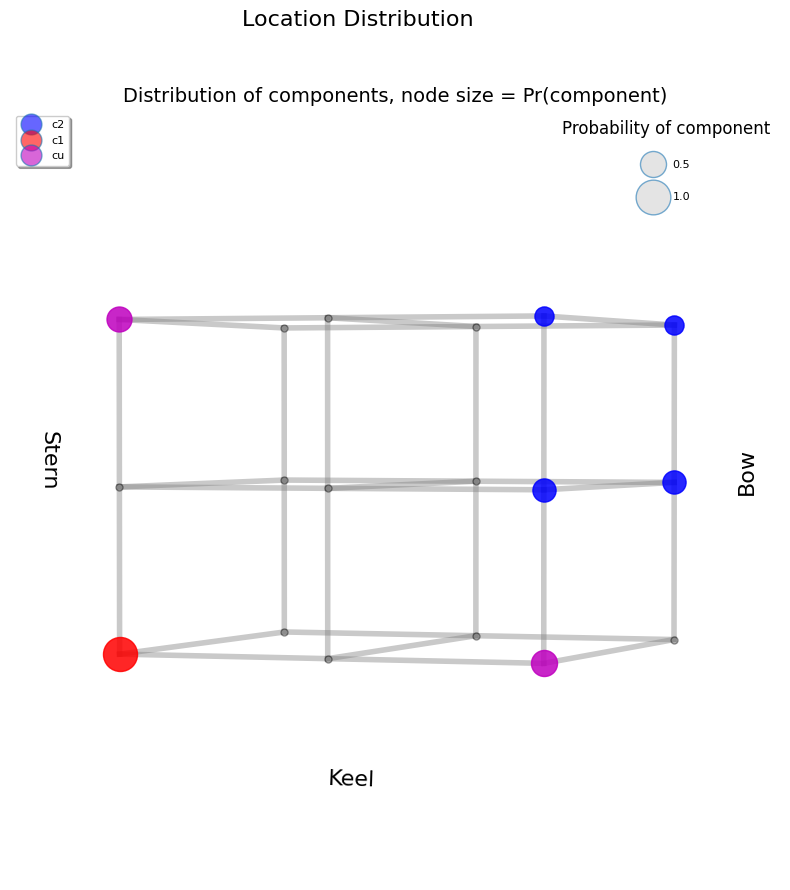

In [3]:
plot_locations2(g_i,
                ir_la,
                ['c2', 'c1', 'cu'],
                scale=.5,
                elev=1,
                angle=-70,
                factor=3.0)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

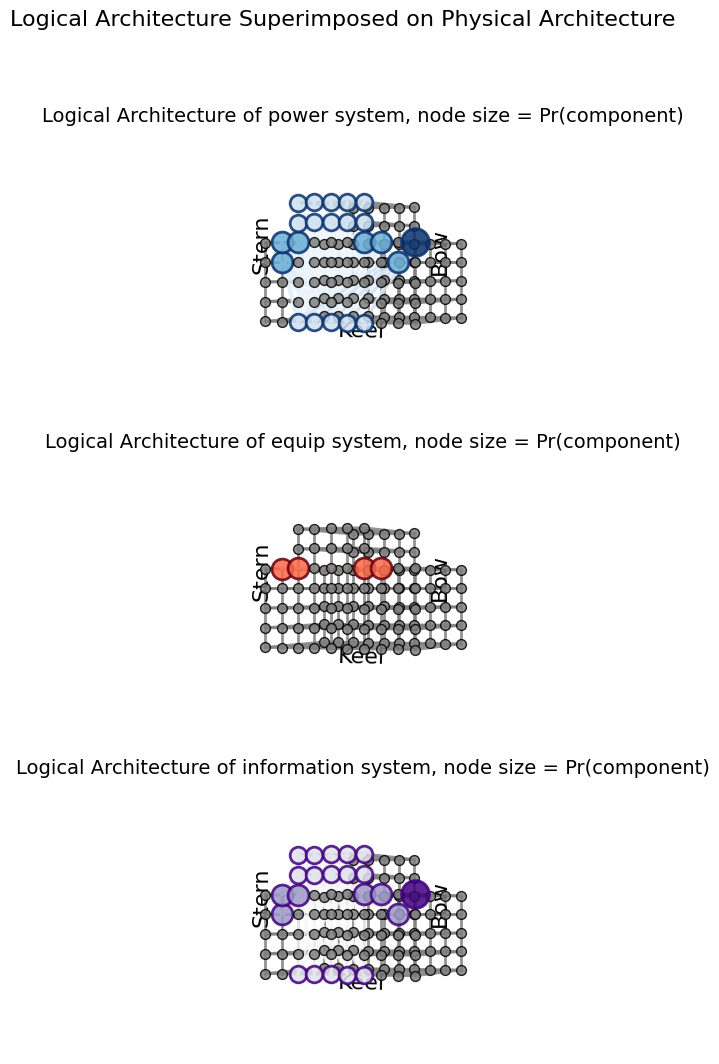

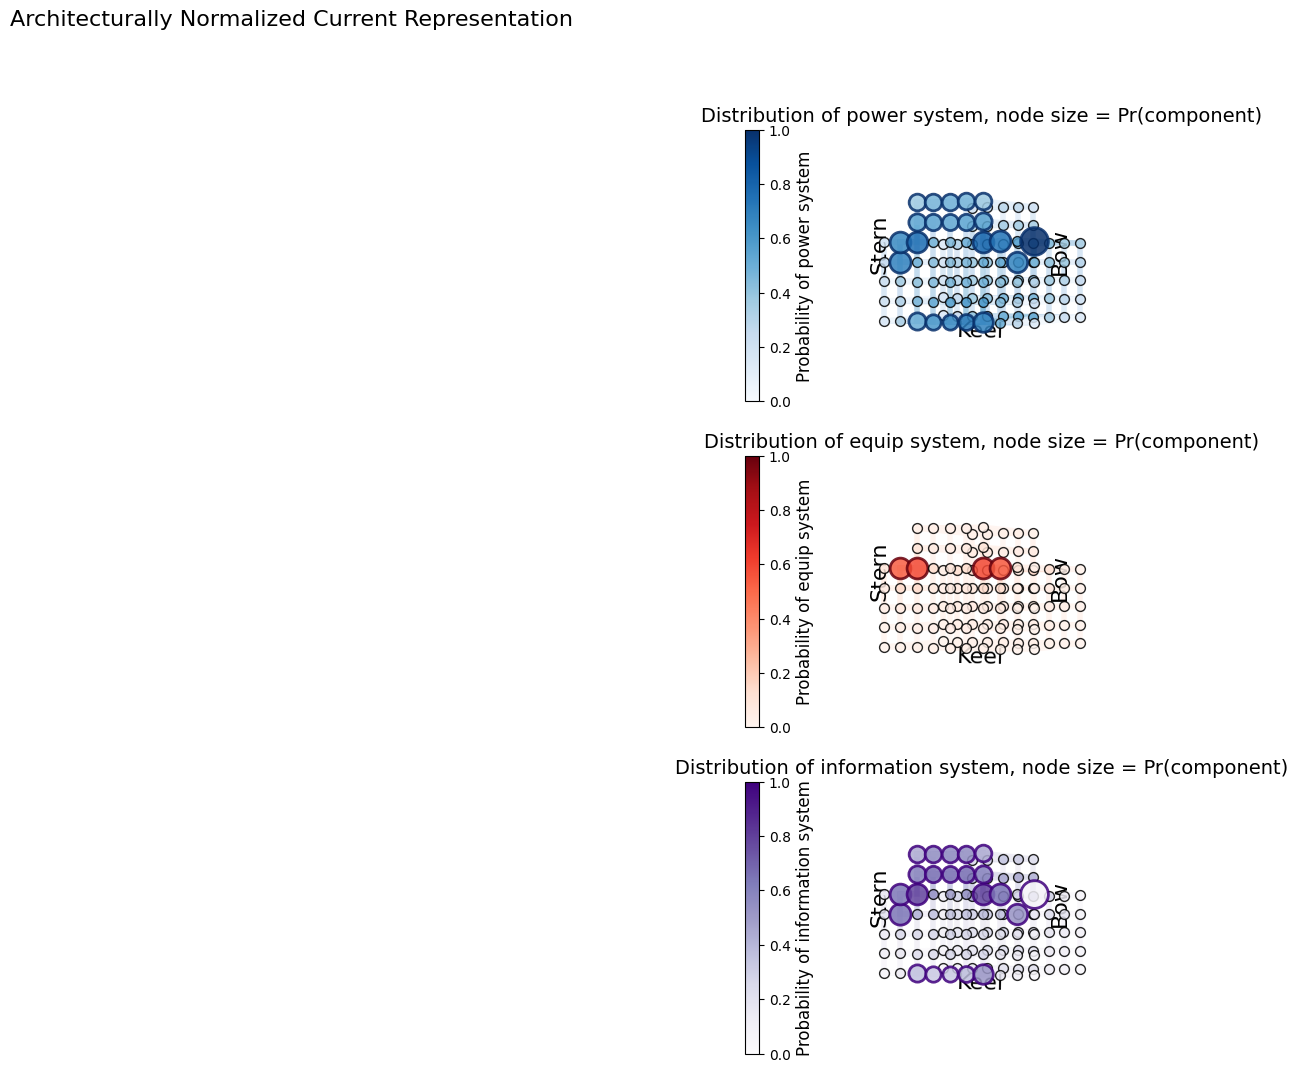

In [4]:
"""
Define Physical and logical architectures for van Oers
"""

#Physical
#g=nx.grid_graph(dim=[10,1,7]) # OLD
g=nx.grid_graph(dim=[7,2,10])
g.remove_nodes_from([(0,0,5),(0,0,6),(1,0,5),(1,0,6),(7,0,5),(7,0,6),(8,0,5),(8,0,6),(9,0,5),(9,0,6)]) # OLD
g.remove_nodes_from([(0,1,5),(0,1,6),(1,1,5),(1,1,6),(7,1,5),(7,1,6),(8,1,5),(8,1,6),(9,1,5),(9,1,6)])
# print nx.is_connected(g)

#Components and locations - first configuration
pp={(2,0,0):0.0,(3,0,0):0.0,(4,0,0):0.0,(5,0,0):1.0,(6,0,0):0.0}
VLS={(8,0,3):1.0,(1,0,3):0.0}
bridge={(2,0,5):0.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):1.0}
fdeck={(1,0,4):1.0,(2,0,4):0.0,(6,0,4):0.0,(7,0,4):0.0}
hangar={(3,0,4):1.0,(4,0,4):0.0,(5,0,4):0.0,}
radar={(2,0,6):0.0,(3,0,6):0.0,(4,0,6):0.0,(5,0,6):1.0,(6,0,6):0.0}
gun={(8,0,4):1.0,(9,0,4):0.0}

#Swtiched
s_bridge={(2,0,5):1.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):0.0}
s_fdeck={(1,0,4):0.0,(2,0,4):0.0,(6,0,4):1.0,(7,0,4):0.0}
s_VLS={(8,0,3):0.0,(1,0,3):1.0}

#Components and unknown
# u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
# u_VLS={(8,0,3):'un',(1,0,3):'un'}
# u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
# u_hangar={(3,0,4):'un',(4,0,4):'un',(5,0,4):'un'}
# u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
# u_gun={(8,0,4):'un',(9,0,4):'un'}

u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un', (2,1,0):'un',(3,1,0):'un',(4,1,0):'un',(5,1,0):'un',(6,1,0):'un'}
u_VLS={(8,0,3):'un',(1,0,3):'un'}
u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
u_fdeck={(1,0,4):'un',(7,0,4):'un'}
u_hangar={(2,0,4):'un',(6,0,4):'un'}
u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
u_gun={(9,0,4):'un'}



#Logical
la={}

#Define components
la['components']={}

#Power plant
la['components']['propulsion plant']={}
la['components']['propulsion plant']['loc']=u_pp

#Vertical Launch System
la['components']['VLS']={}
la['components']['VLS']['loc']=u_VLS

#Bridge
la['components']['bridge']={}
la['components']['bridge']['loc']=u_bridge

#Flight Deck
la['components']['flight deck']={}
la['components']['flight deck']['loc']=u_fdeck

#Hangar
la['components']['hangar']={}
la['components']['hangar']['loc']=u_hangar

#Radar
la['components']['radar mast']={}
la['components']['radar mast']['loc']=u_radar

#Gun
la['components']['fwd. gun']={}
la['components']['fwd. gun']['loc']=u_gun



#Logical systems
la['systems']=[]

#power
la['systems'].append('power')

p=nx.DiGraph()
p.add_node('propulsion plant',loc=la['components']['propulsion plant']['loc'])
p.add_node('VLS',loc=la['components']['VLS']['loc'])
p.add_node('bridge',loc=la['components']['bridge']['loc'])
p.add_node('flight deck',loc=la['components']['flight deck']['loc'])
p.add_node('hangar',loc=la['components']['hangar']['loc'])
p.add_node('radar mast',loc=la['components']['radar mast']['loc'])
p.add_node('fwd. gun',loc=la['components']['fwd. gun']['loc'])

p.add_edges_from([('propulsion plant',x) for x in p.nodes()])
p.remove_edge('propulsion plant','propulsion plant')

la['power']=p



#equipment
la['systems'].append('equip')
e=p.copy()

#e.remove_edges_from(e.edges()) #matt, I think this may spark up an error now in py3 as e.edges() maybe used to be some
#iterable but now its an object so the input now changes on each iteration, changing this to doing this from a copy of a list(e.edges)
a = list(e.edges())
e.remove_edges_from(a)


e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast','fwd. gun'])
#e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast'])
e.add_edge('hangar','flight deck')


# print e.nodes(data=True)
# print e.edges(data=True)

la['equip']=e


#information
la['systems'].append('information')
i=p.copy()

a = list(i.edges()) #addition from matt

i.remove_edges_from(a)
#i.remove_edges_from(e.edges())

# i.remove_nodes_from(['propulsion plant'])
#i.add_edges_from([('radar mast','bridge'),('bridge','fwd. gun'),
#                  ('bridge','hangar'),('bridge','flight deck'),
#                  ('bridge','VLS'),('bridge','propulsion plant')])
i.add_edges_from([('radar mast','bridge'),
                  ('bridge','hangar'),('bridge','flight deck'),
                  ('bridge','VLS'),('bridge','propulsion plant')])

la['information']=i

#image
# la['systems'].append('image')
# image=nx.DiGraph()
# la['image']=image

la=setup_LA(g,la)
ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)
plot_setups(g, la, scale=.5, elev=0, angle=-70, factor=2.0)
plot_current(g_i, ir_la, scale=.5, elev=0, angle=-70, factor=2.0)


In [10]:

from ANCR_v4_3 import *


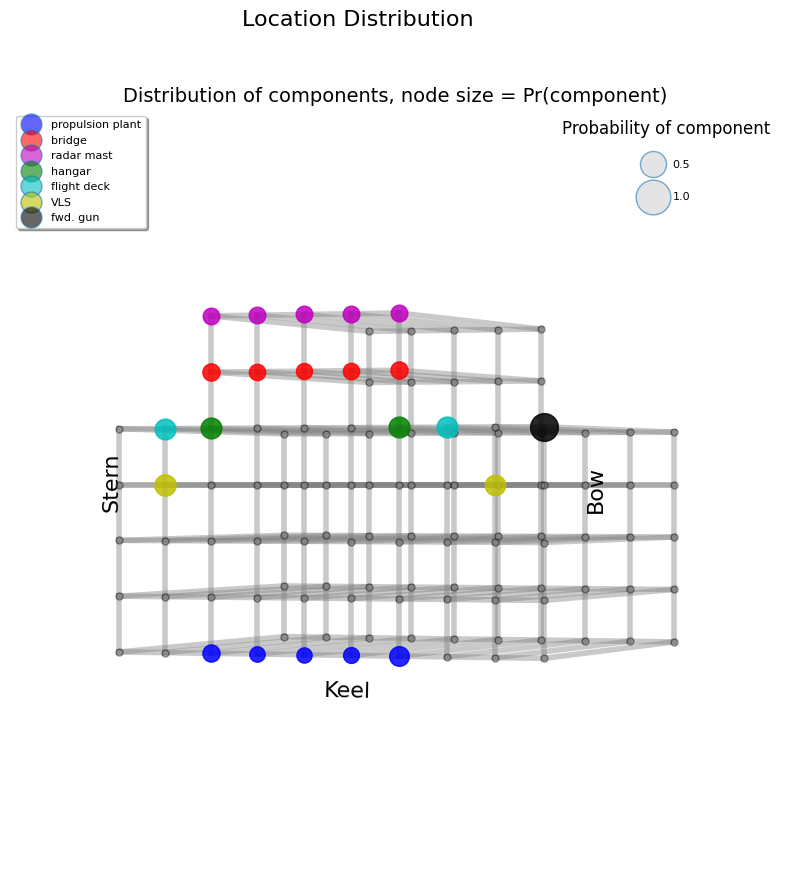

In [5]:
plot_locations2(g_i,
                ir_la,
                ['propulsion plant','bridge','radar mast','hangar','flight deck','VLS','fwd. gun'],
                scale=.5,
                elev=0,
                angle=-70,
                factor=2.0)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

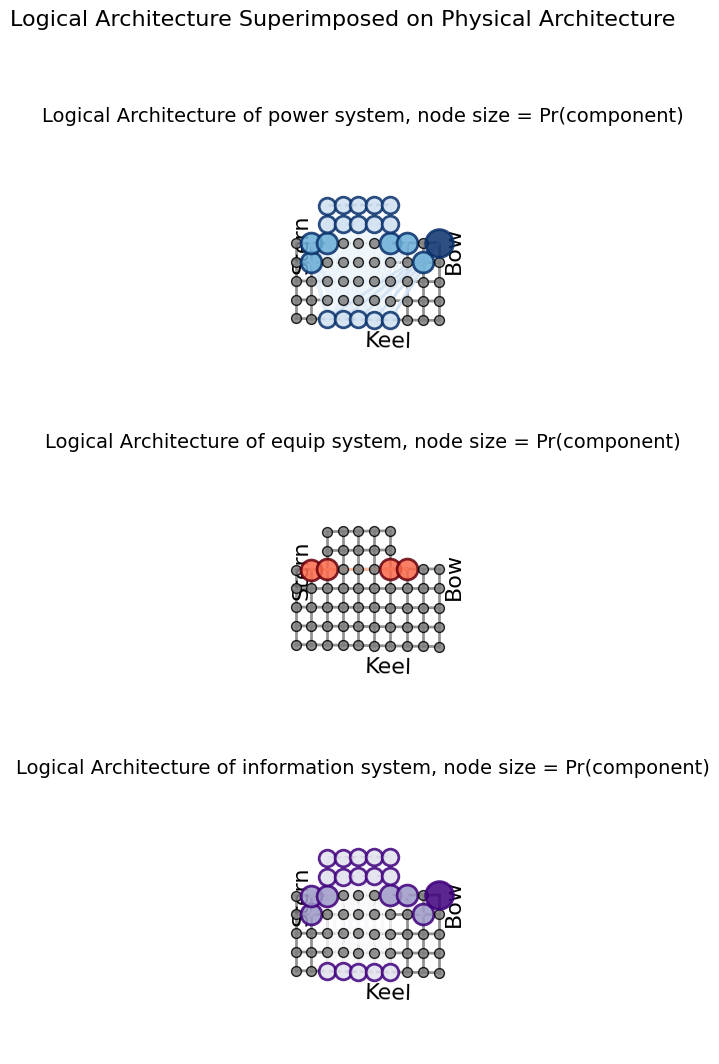

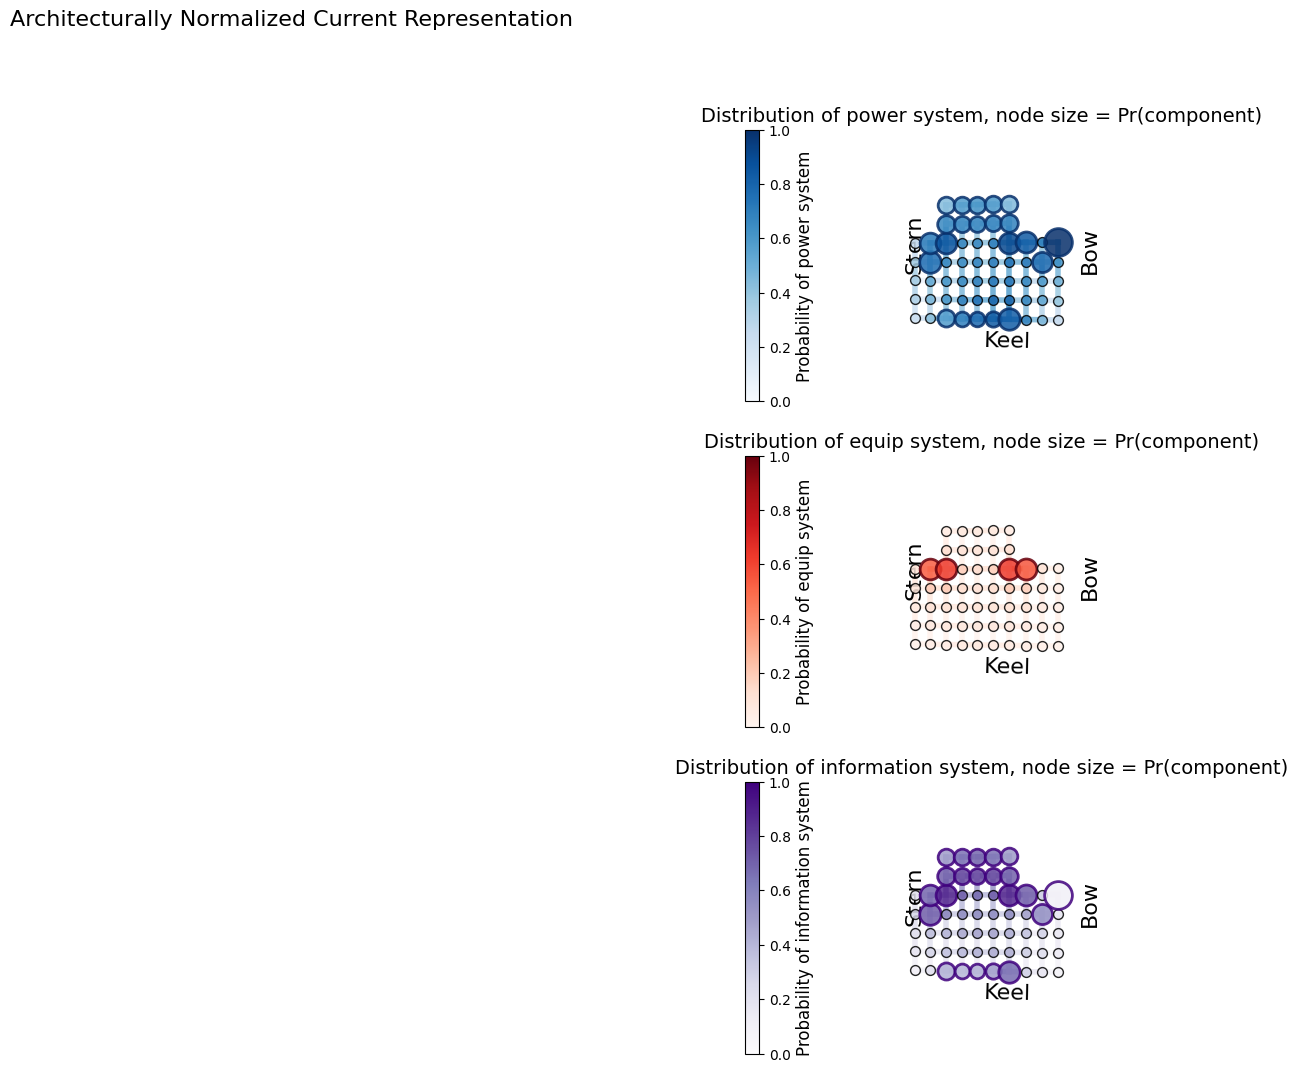

In [3]:
"""
Define Physical and logical architectures for van Oers
"""

#Physical
#g=nx.grid_graph(dim=[10,1,7])
g=nx.grid_graph(dim=[7,1,10])
g.remove_nodes_from([(0,0,5),(0,0,6),(1,0,5),(1,0,6),(7,0,5),(7,0,6),(8,0,5),(8,0,6),(9,0,5),(9,0,6)])
# print nx.is_connected(g)

#Components and locations - first configuration
pp={(2,0,0):0.0,(3,0,0):0.0,(4,0,0):0.0,(5,0,0):1.0,(6,0,0):0.0}
VLS={(8,0,3):1.0,(1,0,3):0.0}
bridge={(2,0,5):0.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):1.0}
fdeck={(1,0,4):1.0,(2,0,4):0.0,(6,0,4):0.0,(7,0,4):0.0}
hangar={(3,0,4):1.0,(4,0,4):0.0,(5,0,4):0.0,}
radar={(2,0,6):0.0,(3,0,6):0.0,(4,0,6):0.0,(5,0,6):1.0,(6,0,6):0.0}
gun={(8,0,4):1.0,(9,0,4):0.0}

#Swtiched
s_bridge={(2,0,5):1.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):0.0}
s_fdeck={(1,0,4):0.0,(2,0,4):0.0,(6,0,4):1.0,(7,0,4):0.0}
s_VLS={(8,0,3):0.0,(1,0,3):1.0}

#Components and unknown
# u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
# u_VLS={(8,0,3):'un',(1,0,3):'un'}
# u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
# u_hangar={(3,0,4):'un',(4,0,4):'un',(5,0,4):'un'}
# u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
# u_gun={(8,0,4):'un',(9,0,4):'un'}

u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
u_VLS={(8,0,3):'un',(1,0,3):'un'}
u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
u_fdeck={(1,0,4):'un',(7,0,4):'un'}
u_hangar={(2,0,4):'un',(6,0,4):'un'}
u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
u_gun={(9,0,4):'un'}



#Logical
la={}

#Define components
la['components']={}

#Power plant
la['components']['propulsion plant']={}
la['components']['propulsion plant']['loc']=u_pp

#Vertical Launch System
la['components']['VLS']={}
la['components']['VLS']['loc']=u_VLS

#Bridge
la['components']['bridge']={}
la['components']['bridge']['loc']=u_bridge

#Flight Deck
la['components']['flight deck']={}
la['components']['flight deck']['loc']=u_fdeck

#Hangar
la['components']['hangar']={}
la['components']['hangar']['loc']=u_hangar

#Radar
la['components']['radar mast']={}
la['components']['radar mast']['loc']=u_radar

#Gun
la['components']['fwd. gun']={}
la['components']['fwd. gun']['loc']=u_gun



#Logical systems
la['systems']=[]

#power
la['systems'].append('power')

p=nx.DiGraph()
p.add_node('propulsion plant',loc=la['components']['propulsion plant']['loc'])
p.add_node('VLS',loc=la['components']['VLS']['loc'])
p.add_node('bridge',loc=la['components']['bridge']['loc'])
p.add_node('flight deck',loc=la['components']['flight deck']['loc'])
p.add_node('hangar',loc=la['components']['hangar']['loc'])
p.add_node('radar mast',loc=la['components']['radar mast']['loc'])
p.add_node('fwd. gun',loc=la['components']['fwd. gun']['loc'])

p.add_edges_from([('propulsion plant',x) for x in p.nodes()])
p.remove_edge('propulsion plant','propulsion plant')

la['power']=p



#equipment
la['systems'].append('equip')
e=p.copy()

#e.remove_edges_from(e.edges()) #matt, I think this may spark up an error now in py3 as e.edges() maybe used to be some
#iterable but now its an object so the input now changes on each iteration, changing this to doing this from a copy of a list(e.edges)
a = list(e.edges())
e.remove_edges_from(a)


e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast','fwd. gun'])
#e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast'])
e.add_edge('hangar','flight deck')


# print e.nodes(data=True)
# print e.edges(data=True)

la['equip']=e


#information
la['systems'].append('information')
i=p.copy()

a = list(i.edges()) #addition from matt

i.remove_edges_from(a)
#i.remove_edges_from(e.edges())

# i.remove_nodes_from(['propulsion plant'])
#i.add_edges_from([('radar mast','bridge'),('bridge','fwd. gun'),
#                  ('bridge','hangar'),('bridge','flight deck'),
#                  ('bridge','VLS'),('bridge','propulsion plant')])
i.add_edges_from([('radar mast','bridge'),
                  ('bridge','hangar'),('bridge','flight deck'),
                  ('bridge','VLS'),('bridge','propulsion plant')])

la['information']=i

#image
# la['systems'].append('image')
# image=nx.DiGraph()
# la['image']=image

la=setup_LA(g,la)
ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)
plot_setups(g, la, scale=.5, elev=0, angle=-70, factor=2.0)
plot_current(g_i, ir_la, scale=.5, elev=0, angle=-70, factor=2.0)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

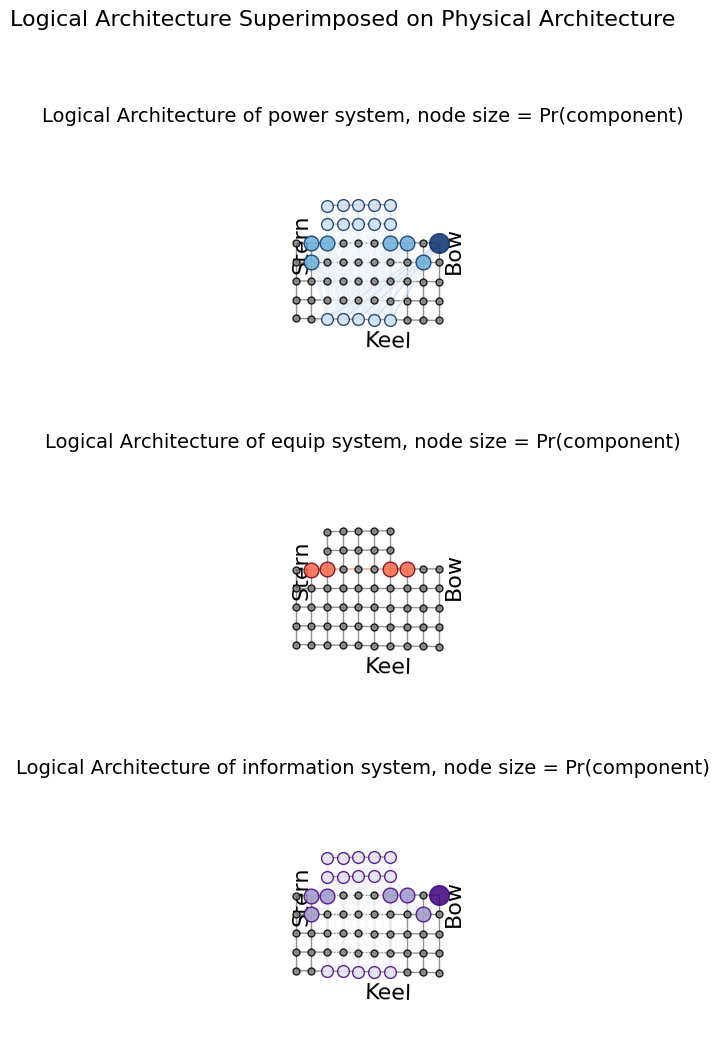

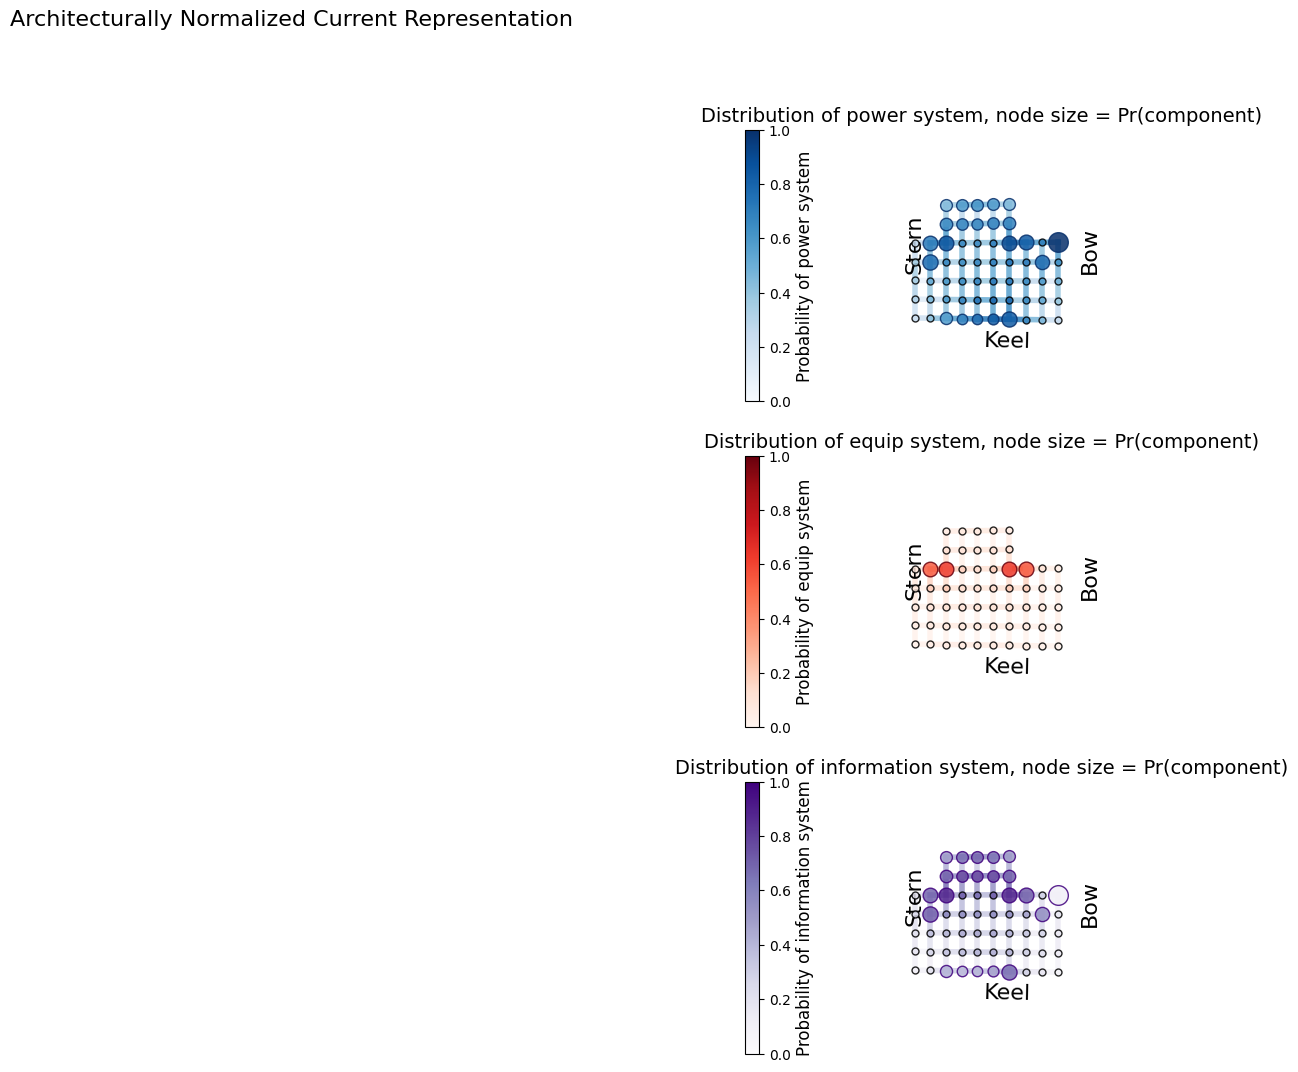

In [4]:
plot_setups(g, la, scale=.25, elev=0, angle=-70, factor=2.0)
plot_current(g_i, ir_la, scale=.25, elev=0, angle=-70, factor=2.0)
